# Forward modelling example, gravity anomaly from buried mineral

Corresponds to Chapter 5 of the course "Introduction to digital twin" by Romain CHASSAGNE - https://rlchassagne.github.io/

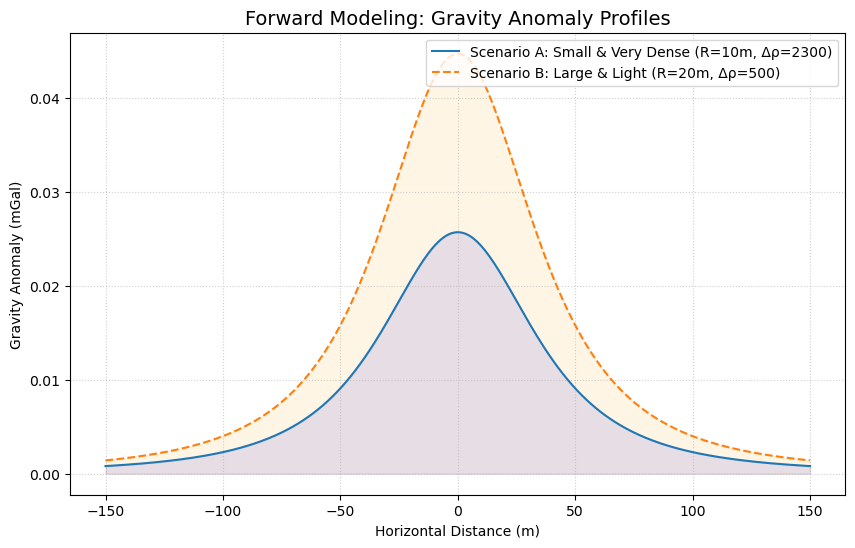

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def gravity_forward_model(x, depth, radius, density_ore, density_host):
    """
    Calculates the vertical gravity anomaly over a buried sphere.
    x: distance on surface (m)
    depth: depth to center of sphere (m)
    radius: radius of the sphere (m)
    density_ore: density of the mineral body (kg/m3)
    density_host: density of the surrounding rock (kg/m3)
    """
    G = 6.674e-11  # Gravitational constant
    
    # 1. PARAMETER: Density Contrast (Delta Rho)
    # This tells us how much 'heavier' the ore is compared to the rock
    delta_rho = density_ore - density_host
    
    # 2. PARAMETER: Radius (R)
    # Used to calculate the Volume. Note that R is cubed (R^3)
    volume = (4/3) * np.pi * (radius**3)
    
    # 3. MASS EXCESS
    # Combine density and volume to get the total extra mass
    mass_excess = volume * delta_rho
    
    # 4. FORWARD MODEL FORMULA
    # We multiply by 1e5 to convert from SI units to mGal (standard unit)
    gz = (G * mass_excess * depth) / (x**2 + depth**2)**1.5
    return gz * 1e5

# --- Simulation Settings ---
x_surface = np.linspace(-150, 150, 300)

# Scenario A: Small, high-density body (e.g., massive Sulfide)
signal_a = gravity_forward_model(x_surface, depth=50, radius=10, 
                                 density_ore=5000, density_host=2700)

# Scenario B: Large, medium-density body (e.g., altered zone)
signal_b = gravity_forward_model(x_surface, depth=50, radius=20, 
                                 density_ore=3200, density_host=2700)

# --- Plotting ---
plt.figure(figsize=(10, 6))
plt.plot(x_surface, signal_a, label="Scenario A: Small & Very Dense (R=10m, Δρ=2300)")
plt.plot(x_surface, signal_b, label="Scenario B: Large & Light (R=20m, Δρ=500)", linestyle='--')

plt.fill_between(x_surface, signal_a, alpha=0.1, color='blue')
plt.fill_between(x_surface, signal_b, alpha=0.1, color='orange')

plt.title("Forward Modeling: Gravity Anomaly Profiles", fontsize=14)
plt.xlabel("Horizontal Distance (m)")
plt.ylabel("Gravity Anomaly (mGal)")
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.show()